In [1]:
import torch
print("PyTorch version: ", torch.__version__)
print("is cuda available: ", torch.cuda.is_available())

import warnings
warnings.filterwarnings('ignore', category=UserWarning, message='TypedStorage is deprecated')

PyTorch version:  2.0.0+cu117
is cuda available:  True


In [2]:
%%time
from p2t2 import simulate

simulate(
    config_file="config.yaml",
    model_type="P2T2",
    min_te=5.0,
    max_te=15.0,
    n_echoes=20,
    num_signals=10000,
    out_folder='data'
)

Simulating data to: data


Processing Pathology: 100%|██████████████████████████████████████████████████████████████| 7/7 [32:46<00:00, 280.88s/it]

CPU times: user 1h 11min 26s, sys: 23.7 s, total: 1h 11min 50s
Wall time: 1h 12min 45s


In [3]:
%%time
from p2t2 import train

train(
    config='config.yaml',
    data_folder="data",
    output_path="runs",
    model_type='P2T2-FC', 
    min_te=7.9,
    max_te=None
)

Running training...
in channels = 40, num layers = 12


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [5:54:43<00:00, 21.28s/it]


finished train, best val loss: 301.684761, at epoch 963
CPU times: user 2d 11h 27min 36s, sys: 54min 53s, total: 2d 12h 22min 29s
Wall time: 5h 55min 9s


In [4]:
%%time
from p2t2 import infer
import os

data_root = 'mri_example/'
data_name = 'Brats18_TCIA13_645_1_t1_230318_221644_slice_100'
data_dict = {
    'mri': os.path.join(data_root, f'{data_name}.nii.gz'),
    'metadata': os.path.join(data_root, f'{data_name}_metadata.json') 
}

infer(
    model_type="P2T2-FC",
    model_path="runs/P2T2-FC__data_240430_14_52_52/best_model.pt",
    model_args_path="runs/P2T2-FC__data_240430_14_52_52/config.yaml",
    data_dict=data_dict,
    output_dir="output"
)

Uploading MRI data...
MRI data uploaded
Loading the model...
Model loaded
Deploying the model...
Computing EPGs...
EPGs computed


100%|███████████████████████████████████████████████████████████████████████████████████| 12/12 [06:59<00:00, 35.00s/it]


CPU times: user 7min 27s, sys: 3.56 s, total: 7min 31s
Wall time: 7min 9s


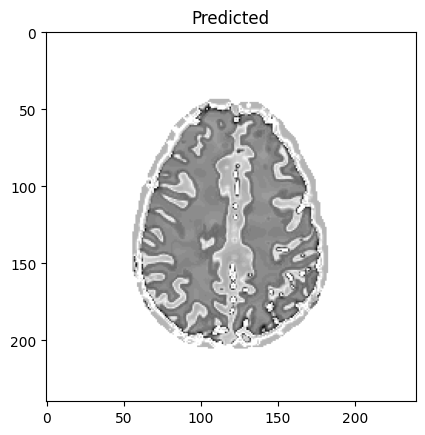

In [5]:
import SimpleITK as sitk
from matplotlib import pyplot as plt

predicted = sitk.ReadImage("output/predicted_fa.nii.gz")
plt.imshow(sitk.GetArrayFromImage(predicted), cmap="gray");
plt.title("Predicted");

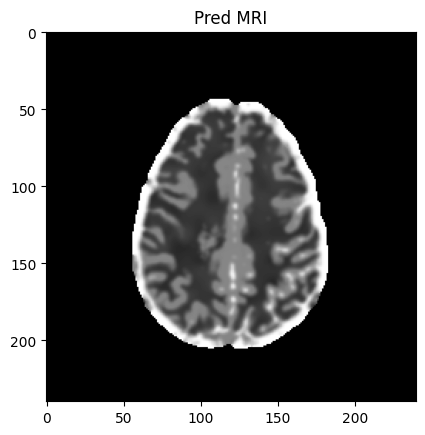

In [6]:
import SimpleITK as sitk
from matplotlib import pyplot as plt

pred_mri = sitk.ReadImage("output/pred_mri.nii.gz")
plt.imshow(sitk.GetArrayFromImage(pred_mri)[10,:,:], cmap="gray");
plt.title("Pred MRI");

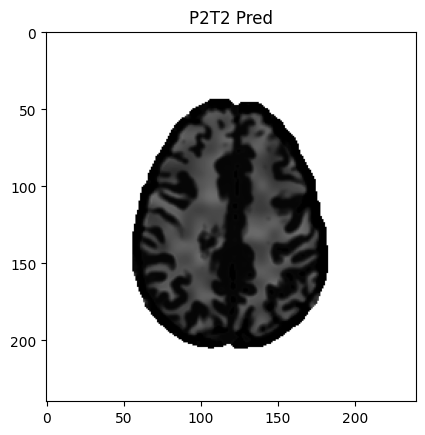

In [7]:
import SimpleITK as sitk
from matplotlib import pyplot as plt

pt2_pred = sitk.ReadImage("output/pt2_pred.nii.gz")
plt.imshow(sitk.GetArrayFromImage(pt2_pred)[10,:,:], cmap="gray");
plt.title("P2T2 Pred");